In [1]:
import pandas as pd

In [51]:
df=pd.read_csv("Market_Basket_Optimisation.csv", sep=",", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [54]:
#df.columns = df.columns.str.replace(' ','_')
#df

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
titres=[]
for col_name in df.columns: 
    titres.append(col_name)
print(titres)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [57]:
titles=pd.DataFrame(titres)
titles

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


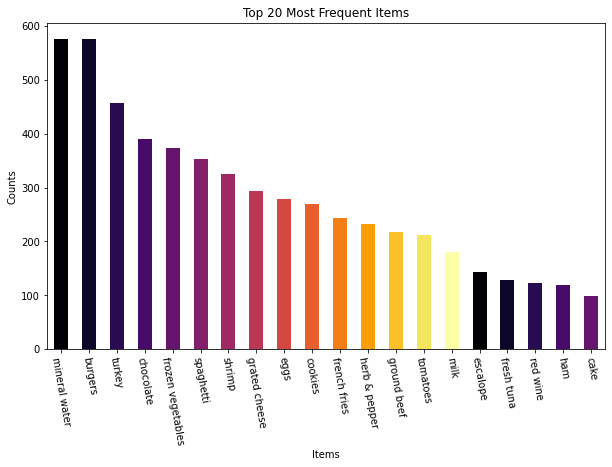

In [74]:
plt.rcParams['figure.figsize'] = (10,6)
color = plt.cm.inferno(np.linspace(0,1,15))

plt.title('Top 20 Most Frequent Items')
plt.ylabel('Counts')
plt.xlabel('Items')

df[0].value_counts().head(20).plot.bar(color = color)
plt.xticks(rotation = -80)
plt.show()

In [73]:
import squarify

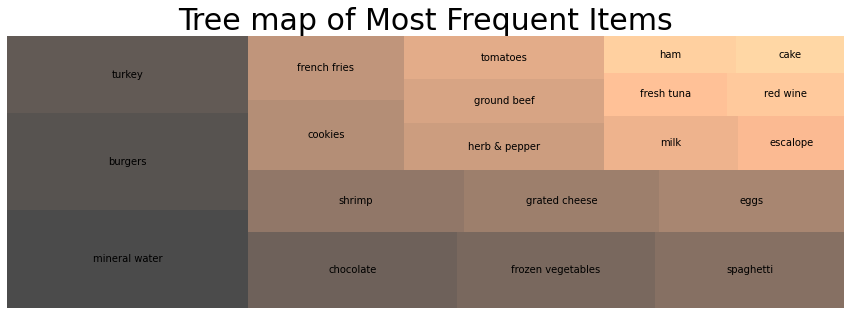

In [87]:
plt.rcParams['figure.figsize']=(15,5)

Items = df[0].value_counts().head(20).to_frame()
size = Items[0].values
lab = Items.index
color = plt.cm.copper(np.linspace(0,1,20))
squarify.plot(sizes=size, label=lab, alpha = 0.7, color=color)

plt.title('Tree map of Most Frequent Items', fontsize=30)
plt.axis('off')
plt.show()

In [88]:
import mlxtend
from mlxtend.preprocessing import TransactionEncoder

In [92]:
transactions = []
for i in range(0,7501):
    transactions.append([str(df.values[i,j]) for j in range(0,20)])

In [97]:
te = TransactionEncoder()
dataset = te.fit_transform(transactions)
dataset

array([[False,  True,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [101]:
df = pd.DataFrame(dataset, columns= te.columns_)
df


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [102]:
from mlxtend.frequent_patterns import apriori, association_rules

In [109]:
frequent_itemsets= apriori(df, min_support=0.001, use_colnames=True)
frequent_itemsets["length"]= frequent_itemsets["itemsets"].apply(lambda x : len(x))
frequent_itemsets.head(20)

,support,itemsets,length
0,0.020397,(almonds),1
1,0.008932,(antioxydant juice),1
2,0.004666,(asparagus),1
3,0.033329,(avocado),1
4,0.004533,(babies food),1
5,0.008666,(bacon),1
6,0.010799,(barbecue sauce),1
7,0.014265,(black tea),1
8,0.009199,(blueberries),1
9,0.011465,(body spray),1


In [111]:
frequent_itemsets[frequent_itemsets['length'] >= 3].head(20) #Filter Frequent itemset of minimum length 3

,support,itemsets,length
2295,0.001600,"(almonds, avocado, nan)",3
2296,0.001333,"(chicken, almonds, burgers)",3
2297,0.001466,"(chocolate, almonds, burgers)",3
2298,0.002266,"(eggs, almonds, burgers)",3
2299,0.001333,"(almonds, burgers, french fries)",3
2300,0.001200,"(almonds, green tea, burgers)",3
2301,0.001200,"(ground beef, almonds, burgers)",3
2302,0.001600,"(almonds, burgers, milk)",3
2303,0.001866,"(almonds, burgers, mineral water)",3
2304,0.005199,"(almonds, burgers, nan)",3


In [114]:
ass_rules= association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
ass_rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(almonds),(nan),0.020397,0.999867,0.020264,0.993464,0.993597,-1.305963e-04,0.020397
1,(antioxydant juice),(nan),0.008932,0.999867,0.008799,0.985075,0.985206,-1.321248e-04,0.008932
2,(asparagus),(nan),0.004666,0.999867,0.004666,1.000000,1.000133,6.220563e-07,inf
3,(avocado),(nan),0.033329,0.999867,0.033196,0.996000,0.996133,-1.288723e-04,0.033329
4,(babies food),(nan),0.004533,0.999867,0.004533,1.000000,1.000133,6.042833e-07,inf


In [118]:
ass_rules= association_rules(frequent_itemsets, metric="lift", min_threshold=1.25)
ass_rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(almonds),(avocado),0.020397,0.033329,0.001733,0.084967,2.549359,0.001053,1.056433
1,(avocado),(almonds),0.033329,0.020397,0.001733,0.052000,2.549359,0.001053,1.033336
2,(almonds),(burgers),0.020397,0.087188,0.005199,0.254902,2.923577,0.003421,1.225089
3,(burgers),(almonds),0.087188,0.020397,0.005199,0.059633,2.923577,0.003421,1.041724
4,(almonds),(cake),0.020397,0.081056,0.003066,0.150327,1.854607,0.001413,1.081527


In [121]:
ass_rules[(ass_rules["lift"]>=5)& (ass_rules["confidence"]>=0.4)].head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2814,"(chicken, almonds)",(burgers),0.002400,0.087188,0.001333,0.555556,6.371899,0.001124,2.053826
4162,"(spaghetti, bacon)",(pancakes),0.003200,0.095054,0.001733,0.541667,5.698516,0.001429,1.974428
4329,"(frozen smoothie, black tea)",(milk),0.001466,0.129583,0.001200,0.818182,6.313973,0.001010,4.787295
4662,"(brownies, energy drink)",(cake),0.002666,0.081056,0.001200,0.450000,5.551727,0.000984,1.670808
4686,"(brownies, honey)",(cake),0.002666,0.081056,0.001200,0.450000,5.551727,0.000984,1.670808


# Conclusion

#### The most frequent association itemset are chicken and almonds with burgers and people always buy this three items together. More significant rules can be found with lower lift and confidence and suport!!!